# ***Heart Disease Prediction***
### **GOALS:**
1. Try using an automated EDA framework or library
2. Learn about cross validation in detail and use it.
3. Implement Decision Trees (Post and Pre Prunning)
4. Read the theory and implement Random Forests
5. Understand the categorical classification metrics such as Classification report etc.
6. Try to check OOB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\PROGRAMMER\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
## Importing the data
data = pd.read_csv("heart.csv")
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
print("Number of samples is - ",  len(data))

Number of samples is -  918


In [4]:
!pip install --user ydata-profiling

In [5]:
# Let's use a automated data profiling tool
# this is pandas profiling tool
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Heart Disease EDA", explorative=True)
profile.to_notebook_iframe()
 # generates in notebook
# profile.to_file("eda_report.html") # generates a html file in the same directory

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 63.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## DATA PREPROCESSING

In [8]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [11]:
'''
Sex, ChestPainType, RestingECG, ExerciseAngine and ST_Slope must be label encoded
'''
from sklearn.preprocessing import LabelEncoder
label_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
enc = LabelEncoder()
for col in label_cols:
    data[col] = enc.fit_transform(data[col])
    
data.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

## MODELLING

In [13]:
from sklearn.model_selection import train_test_split
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(734, 11)
(734,)
(184, 11)
(184,)


## MODEL1 - NORMAL DECISION TREE WITH POST PRUNING

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()
dtree1.fit(X_train, y_train)

DecisionTreeClassifier()

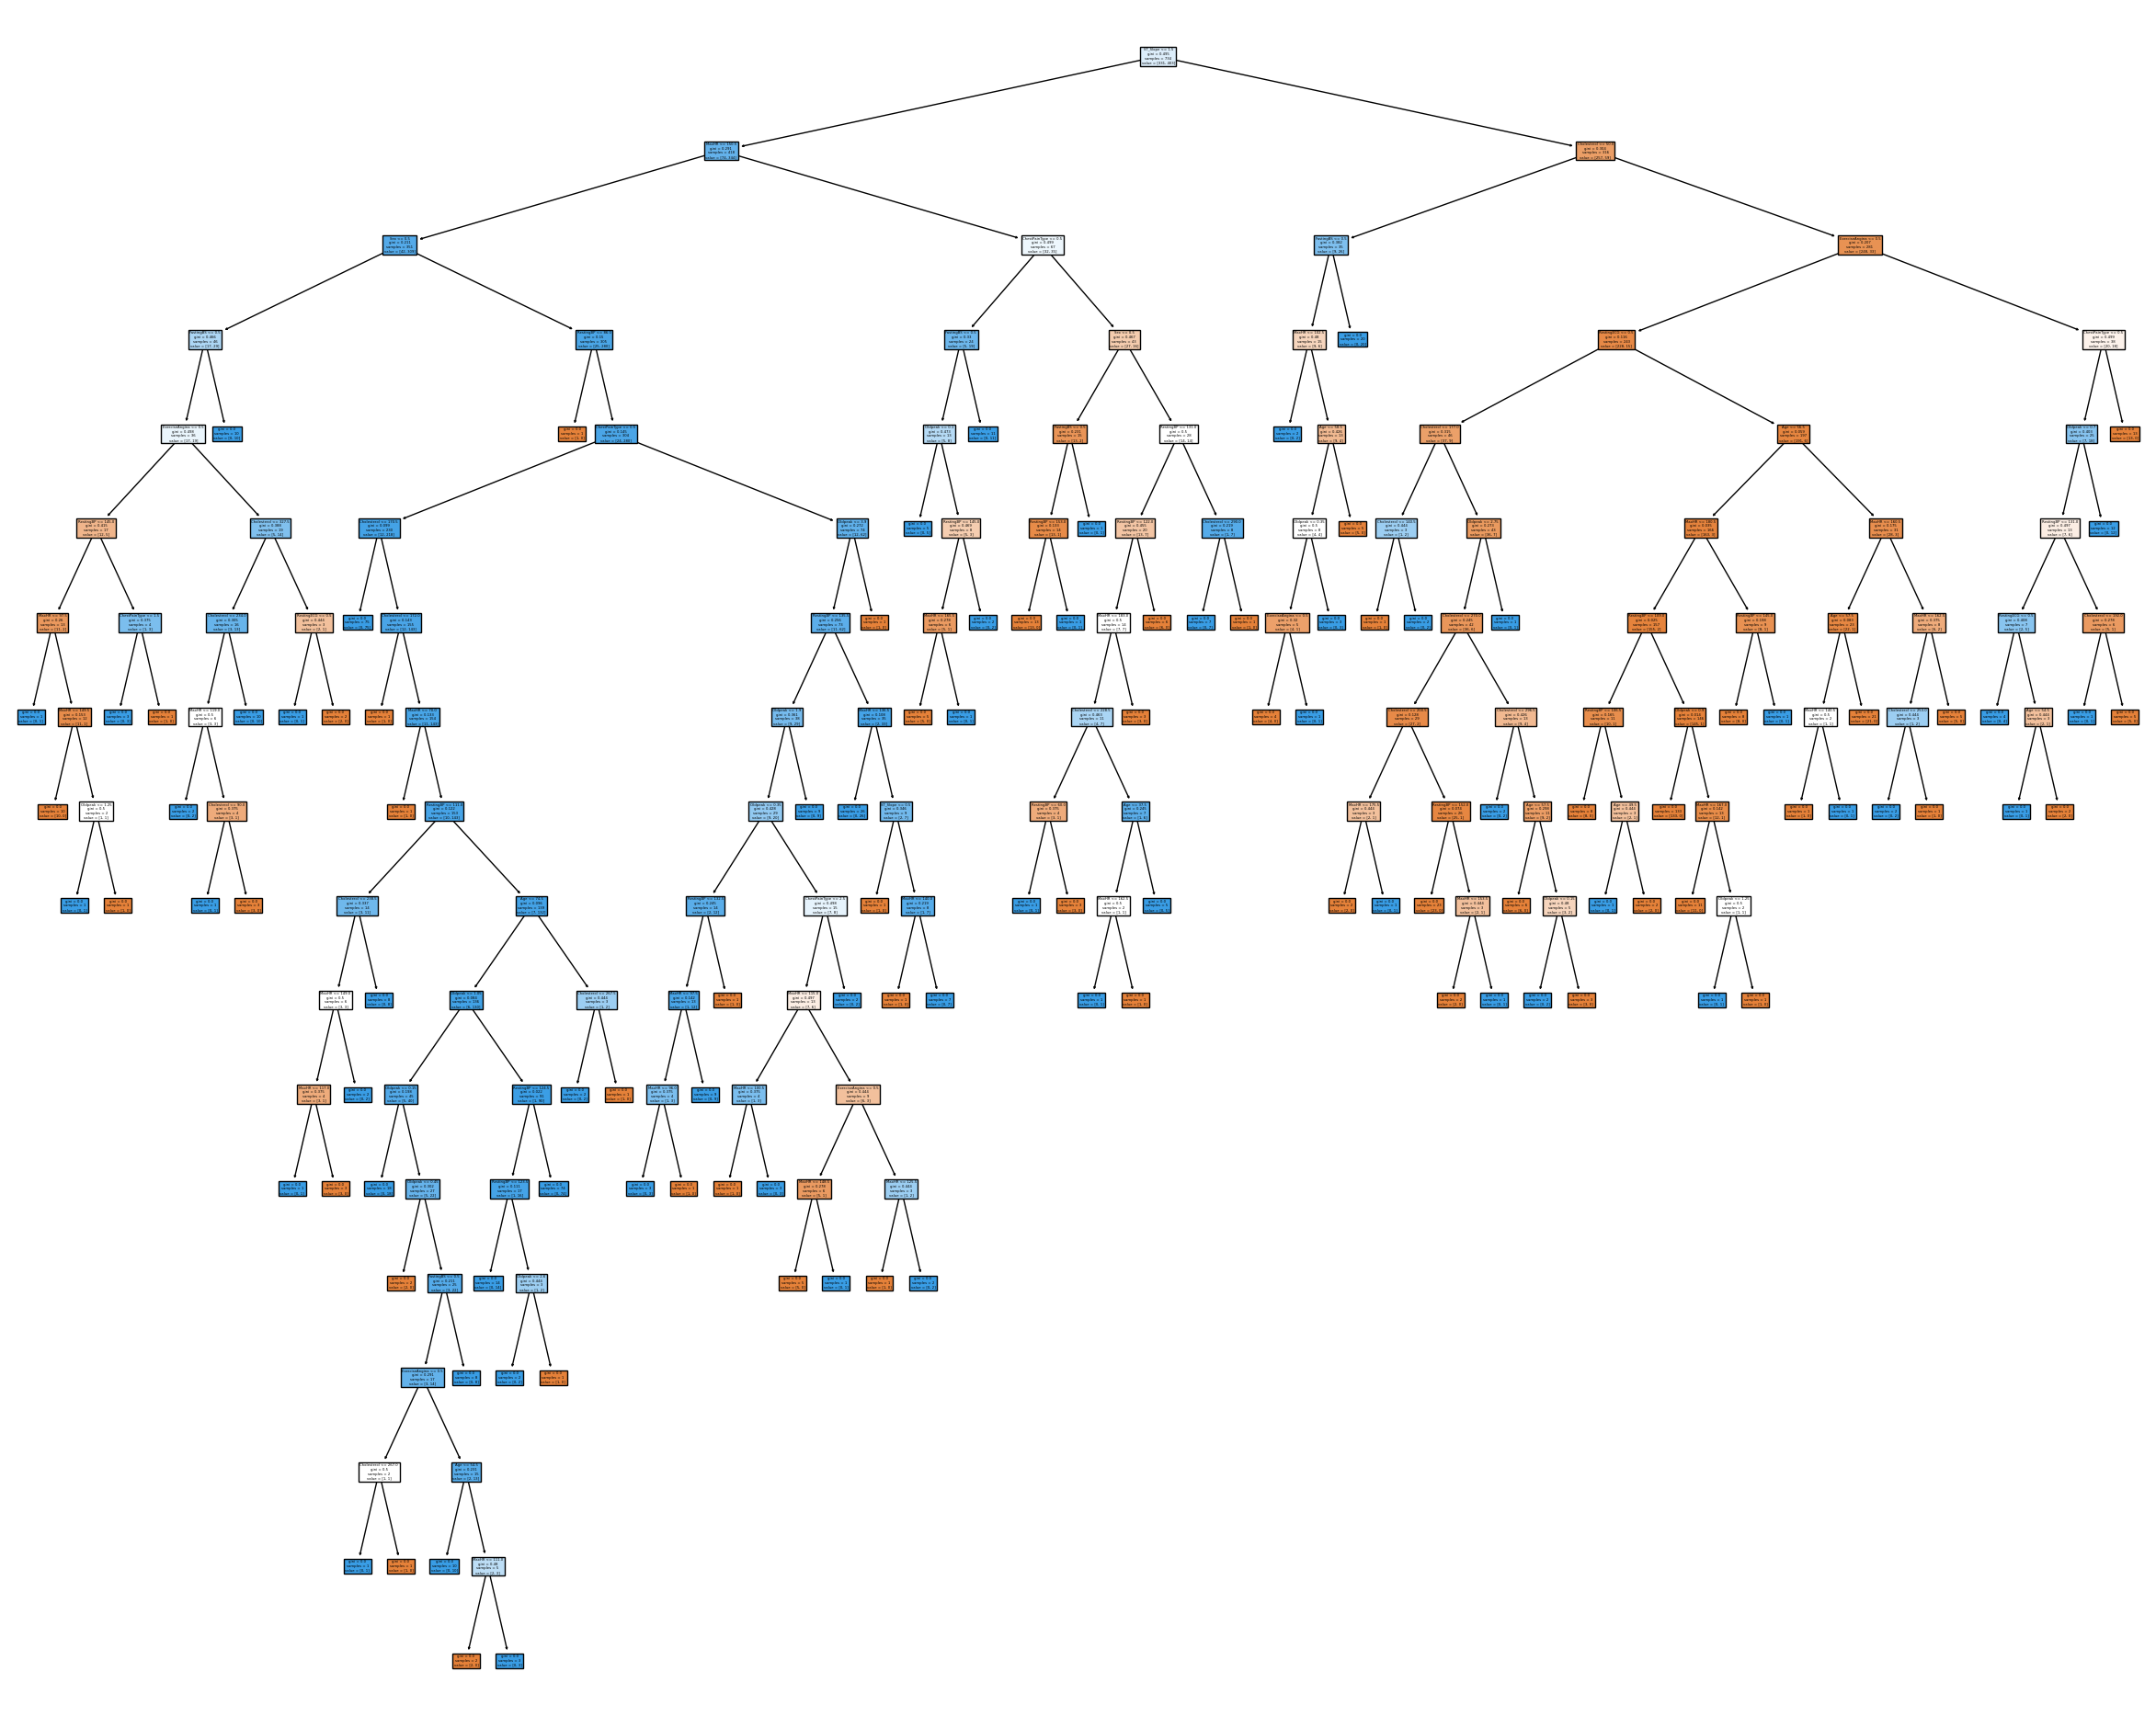

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 24))  # Set a large figure size for clarity
plot_tree(dtree1, filled=True, feature_names=X.columns)
plt.show()

In this case we can see that post pruning and finding the best parameters is hard for us...as the tree is so vast. So let's check the result of this tree and move forward to pre pruning

In [19]:
# predictions
y_preds1 = dtree1.predict(X_test)
y_preds1

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

### CONFUSION MATRIX
Actual values on y and predicted values on x
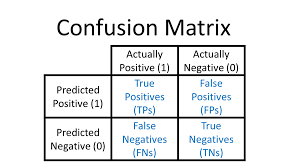
True Positive (TP): Model correctly predicted Disease when the person actually has it.

True Negative (TN): Model correctly predicted No Disease when the person is actually healthy.

False Positive (FP): Model incorrectly predicted Disease when the person is actually healthy (false alarm).

False Negative (FN): Model incorrectly predicted No Disease when the person actually has it (missed diagnosis).

*Means -*
1. TP/TN are the correct predictions by a model for 2 classes
2. FP/FN are the incorrect predictione by the model
3. FP reduces the precision
4. FN reduces the recall
5. TP/TN improves the odel performance

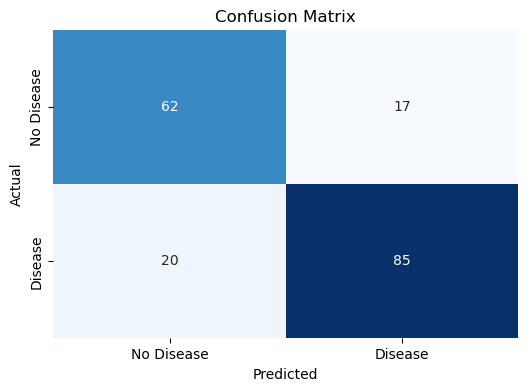

In [22]:
## Let's evaluate them
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds1)

# Plot it nicely
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### METRICS
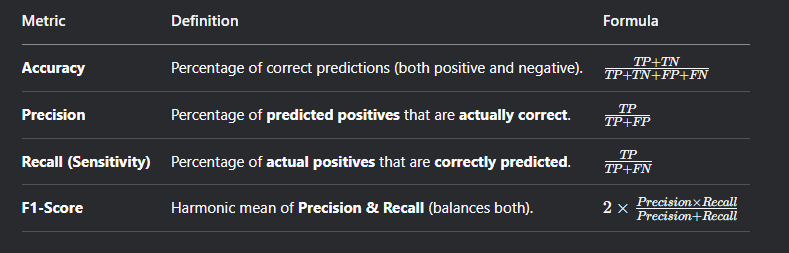

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true = y_test
print(f"Accuracy - {accuracy_score(y_true, y_preds1)}")
print(f"Precision - {precision_score(y_true, y_preds1)}")
print(f"Recall - {recall_score(y_true, y_preds1)}")
print(f"F1 Score - {f1_score(y_true, y_preds1)}")

Accuracy - 0.7989130434782609
Precision - 0.8333333333333334
Recall - 0.8095238095238095
F1 Score - 0.8212560386473431


This means - 
1. Our model correctly predicts about 80% values. - Means on average our model will predict 4 out of 5 inputs correctly.
2. Precision is 83%. Means out of the sample model predicted class YES, only 83% were actually from that class.
3. Recall of 80% means that out of all data model predicted correct, the prediction of the YES class is 4/5.

**WHAT DO THESE TELL US**
1. Accuracy tells that of all models prediction, how much percent of it was actually correct.
2. Precision tells that that of all the samples model predicts as YES or of CLASS1, how much percent of them actually belongs to that class. 
=> For example - For a spam classification, spam - YES and notspam = NO. If the precision if 60%, this means that model predicts lot of not spam messages as SPAM. Hence precision must be high!
3. Recall tells us that how many actual positives are predicted correctly. Means a recall of 70 means 7 YES were correctly predicted and rest 3 were predicted wrong.
4. F1 is a balanced metric which tells us about performance of precision and recall

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        79
           1       0.83      0.81      0.82       105

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



## MODEL2 - DECISION TREES WITH PRE PRUNING AND CROSS VALIDATION

### ***CROSS VALIDATION***
Cross-validation is a technique used to check how well a machine learning model performs on unseen data. It splits the data into several parts, trains the model on some parts and tests it on the remaining part repeating this process multiple times. Finally the results from each validation step are averaged to produce a more accurate estimate of the model's performance.

#### **K-Fold Cross Validation**
* This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds.
* The choice of k is usually 5 or 10, but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller

### ***GRID-SEARCH CV***
1. GridSearchCV systematically tries combinations of hyperparameters (like max_depth, n_estimators, etc.).
2. For each combination, it evaluates performance using K-Fold Cross-Validation (default: cv=5).
3. The model is trained and validated K times (folds), and the average score is computed.
4. The best-performing combination (based on chosen scoring metric) is selected.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()

# for grid search CV we first classify the parameters to compare
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': list(range(1, 16)), # normal dtree has a depth of 16
}

# Now the grid search cv will create k sets of data and use it on diffferent models
# the models will be different models having these params seperately

# When GridSearchCV is testing all the combinations of hyperparameters, it needs a way to measure model performance.
# The scoring parameter tells it what metric to optimize.
# means returns the best model on basis of accuracy/recall/f1 as provided
grid_search = GridSearchCV(dtree, parameters, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'splitter': ['best', 'random']},
             scoring='f1')

### 🔀 `splitter` in Decision Trees (`sklearn.tree.DecisionTreeClassifier`)

The `splitter` parameter controls **how the algorithm chooses the split at each node**.

---

#### ✅ Options:

| Value       | Description |
|-------------|-------------|
| `'best'`    | Default. Greedy strategy — chooses the **best possible split** based on impurity reduction (e.g., Gini or Entropy). |
| `'random'`  | Selects a **random subset of candidate splits**, then picks the best among them. Introduces controlled randomness. |

---

#### 🎯 Why use `'random'`?

- Reduces overfitting by avoiding overly "perfect" splits.
- Speeds up training when working with many features.
- Introduces randomness → useful in ensemble models like Random Forests.

---

#### ⚠️ Important Notes:

- `'random'` **does not pick a completely random feature**; it picks from a **random subset of good options**.
- `'best'` gives higher training accuracy, but can overfit.
- `'random'` may generalize better in noisy data or large datasets.

---

#### 🧠 Analogy:

- `'best'` → **Perfectionist**: Examines every option and picks the absolute best.
- `'random'` → **Efficient**: Looks at a few good options and makes a smart, quick decision.


In [32]:
print("Best Hyperparameters:")
print(grid_search.best_params_)
# Print the best cross-validated score achieved with those parameters
print("\nBest Cross-Validation Score (based on your chosen scoring):")
print(grid_search.best_score_)
# Print the best estimator (i.e., the trained model with best params)
print("\nBest Model (Estimator):")
print(grid_search.best_estimator_)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}

Best Cross-Validation Score (based on your chosen scoring):
0.8921778616043821

Best Model (Estimator):
DecisionTreeClassifier(max_depth=4, splitter='random')


In [34]:
# so now that we have the best params, we will use them for modelling
dtree2 = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='random')
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [35]:
y_preds2 = dtree2.predict(X_test)
y_preds2

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

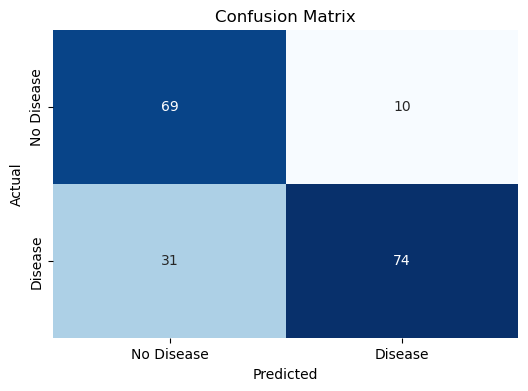

In [36]:
## Let's evaluate them
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds2)

# Plot it nicely
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true = y_test
print(f"Accuracy - {accuracy_score(y_true, y_preds2)}")
print(f"Precision - {precision_score(y_true, y_preds2)}")
print(f"Recall - {recall_score(y_true, y_preds2)}")
print(f"F1 Score - {f1_score(y_true, y_preds2)}")

Accuracy - 0.7771739130434783
Precision - 0.8809523809523809
Recall - 0.7047619047619048
F1 Score - 0.783068783068783


## MODEL3 - DECISION TREES WITH CV ON BASIS OF BEST SCORE

1. This somehow gives us even a bad score than the base dtree.
2. let's get the best model on basis of scoring

In [40]:
scoring_types = ['accuracy', 'precision', 'recall', 'f1']

'''
for multiclass
scoring_types = [
    'accuracy',
    'precision_macro',  # or 'precision_weighted'
    'recall_macro',
    'f1_macro'
]
'''

dtree = DecisionTreeClassifier()

# for grid search CV we first classify the parameters to compare
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': list(range(1, 16)), # normal dtree has a depth of 16
}

for index, scoring_type in enumerate(scoring_types):
    print(f"{index + 1} - {scoring_type}")
    grid_search = GridSearchCV(dtree, parameters, cv=5, scoring=scoring_type, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Hyperparameters:")
    print(grid_search.best_params_)
    print("\nBest Cross-Validation Score (based on your chosen scoring):")
    print(grid_search.best_score_)
    print("\nBest Model (Estimator):")
    print(grid_search.best_estimator_)
    print("==========================================================================")

1 - accuracy
Best Hyperparameters:
{'criterion': 'log_loss', 'max_depth': 4, 'splitter': 'random'}

Best Cross-Validation Score (based on your chosen scoring):
0.8773739632839437

Best Model (Estimator):
DecisionTreeClassifier(criterion='log_loss', max_depth=4, splitter='random')
2 - precision
Best Hyperparameters:
{'criterion': 'log_loss', 'max_depth': 5, 'splitter': 'random'}

Best Cross-Validation Score (based on your chosen scoring):
0.8713395573124746

Best Model (Estimator):
DecisionTreeClassifier(criterion='log_loss', max_depth=5, splitter='random')
3 - recall
Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}

Best Cross-Validation Score (based on your chosen scoring):
0.920679012345679

Best Model (Estimator):
DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')
4 - f1
Best Hyperparameters:
{'criterion': 'log_loss', 'max_depth': 6, 'splitter': 'random'}

Best Cross-Validation Score (based on your chosen scoring):
0.89060

**Now that we have different metrics and parameters according to those metrics. Which to choose?**
***We will run model based on all these***

In [51]:
best_models = [DecisionTreeClassifier(criterion='log_loss', max_depth=4, splitter='random'),
               DecisionTreeClassifier(criterion='log_loss', max_depth=5, splitter='random'), 
               DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random'),
               DecisionTreeClassifier(criterion='log_loss', max_depth=6, splitter='random')]

for index, model in enumerate(best_models):
    print(f"\nModel {index + 1} :")
    dtree = model
    dtree.fit(X_train, y_train)
    y_preds = dtree.predict(X_test)
    print(f"Accuracy - {accuracy_score(y_test, y_preds)}")
    print(f"Precision - {precision_score(y_test, y_preds)}")
    print(f"Recall - {recall_score(y_test, y_preds)}")
    print(f"F1 Score - {f1_score(y_test, y_preds)}")


Model 1 :
Accuracy - 0.8260869565217391
Precision - 0.8230088495575221
Recall - 0.8857142857142857
F1 Score - 0.8532110091743119

Model 2 :
Accuracy - 0.8043478260869565
Precision - 0.822429906542056
Recall - 0.8380952380952381
F1 Score - 0.830188679245283

Model 3 :
Accuracy - 0.8097826086956522
Precision - 0.8365384615384616
Recall - 0.8285714285714286
F1 Score - 0.8325358851674641

Model 4 :
Accuracy - 0.8206521739130435
Precision - 0.839622641509434
Recall - 0.8476190476190476
F1 Score - 0.8436018957345972


In [65]:
dtree3 =  DecisionTreeClassifier(criterion='log_loss', max_depth=5, splitter='random')
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

We get same accuracy nearly from all models but from model 1 we get the best others
**CHOOSE MODEL 2**

## **MODEL 4 - RANDOM FOREST**
**A Random Forest is an ensemble learning method that builds multiple decision trees and combines their results to make better predictions.**
*Think of it like this: Instead of trusting one decision tree (which may overfit or be biased), you ask a “forest” of many trees to vote — and go with the majority decision.*

### How Random Forest Works

#### 1. Bootstrapping (Bagging)
- Random Forest takes **random samples with replacement** from the training data to train each decision tree.
- Some rows may be repeated, and some may be left out.

#### 2. Random Feature Selection
- At each split in a tree, a **random subset of features** is selected (not all features).
- This makes the trees more diverse and reduces correlation between them.

#### 3. Building Multiple Trees
- The model builds **many decision trees** (e.g., 100, 500, etc.).
- Each tree is trained on a different random subset of data and features.

#### 4. Voting (for Classification) / Averaging (for Regression)
- **Classification**: Each tree gives a class prediction, and the forest picks the **majority vote**.
- **Regression**: Each tree gives a numerical prediction, and the forest **averages** these predictions.

#### FEATURES / PARAMETERS - 
n_estimators: Number of trees in the forest.

max_depth: Maximum depth of each tree (controls overfitting).

max_features: Number of features to consider for the best split.

min_samples_split / min_samples_leaf: Controls how splits happen (like in decision trees).

bootstrap: Whether bootstrapping is used when building trees.

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_preds3 = rf1.predict(X_test)
y_preds3

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [55]:
print(f"Accuracy - {accuracy_score(y_test, y_preds3)}")
print(f"Precision - {precision_score(y_test, y_preds3)}")
print(f"Recall - {recall_score(y_test, y_preds3)}")
print(f"F1 Score - {f1_score(y_test, y_preds3)}")

Accuracy - 0.8315217391304348
Precision - 0.8490566037735849
Recall - 0.8571428571428571
F1 Score - 0.8530805687203792


See that is is better than out baseline dtree model

## **MODEL 5 - RANDOM FOREST WITH CROSS VALIDATION**

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

scoring_types = ['accuracy', 'precision', 'recall', 'f1']

# If it's multiclass:
# scoring_types = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
parameters = {
    'n_estimators': [50, 100],           # Number of trees
    'criterion': ['gini', 'entropy'],    # Splitting criteria
    'max_depth': list(range(4, 11)),     # Tree depth
    'min_samples_split': [2, 5, 10],     # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],       # Min samples at a leaf node
}

# Run GridSearchCV for each scoring type
for index, scoring_type in enumerate(scoring_types):
    print(f"{index + 1} - {scoring_type}")
    grid_search = GridSearchCV(rf_model, parameters, cv=5, scoring=scoring_type, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print("Best Hyperparameters:")
    print(grid_search.best_params_)
    
    print("\nBest Cross-Validation Score (based on your chosen scoring):")
    print(grid_search.best_score_)
    
    print("\nBest Model (Estimator):")
    print(grid_search.best_estimator_)
    print("==========================================================================")


1 - accuracy
Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

Best Cross-Validation Score (based on your chosen scoring):
0.8787345075016308

Best Model (Estimator):
RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=42)
2 - precision
Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Best Cross-Validation Score (based on your chosen scoring):
0.8765099551048987

Best Model (Estimator):
RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=42)
3 - recall
Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

Best Cross-Validation Score (based on your chosen scoring):
0.9231172839506172

Best Model (Estimator):
RandomForest

In [59]:
rf_best = RandomForestClassifier(criterion= 'gini',
                                 max_depth= 10,
                                 min_samples_leaf= 4, 
                                 min_samples_split= 10, 
                                 n_estimators= 50)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50)

In [60]:
y_preds4 = rf_best.predict(X_test)

In [61]:
print(f"Accuracy - {accuracy_score(y_test, y_preds4)}")
print(f"Precision - {precision_score(y_test, y_preds4)}")
print(f"Recall - {recall_score(y_test, y_preds4)}")
print(f"F1 Score - {f1_score(y_test, y_preds4)}")

Accuracy - 0.8315217391304348
Precision - 0.8363636363636363
Recall - 0.8761904761904762
F1 Score - 0.8558139534883721


Now the modelling experiments are done.

## **COMPARE THE MODELS**

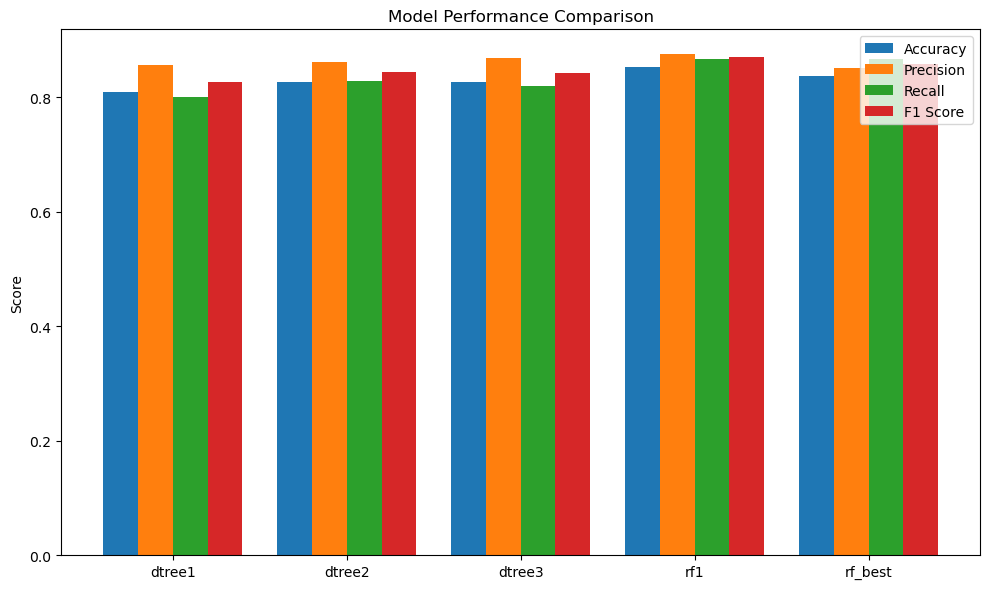

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model_names = ['dtree1', 'dtree2', 'dtree3', 'rf1', 'rf_best']
models = [dtree1, dtree2, dtree3, rf1, rf_best]

metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    metrics['Accuracy'].append(accuracy_score(y_test, y_preds))
    metrics['Precision'].append(precision_score(y_test, y_preds))
    metrics['Recall'].append(recall_score(y_test, y_preds))
    metrics['F1 Score'].append(f1_score(y_test, y_preds))

x = np.arange(len(model_names))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i, (metric_name, values) in enumerate(metrics.items()):
    ax.bar(x + i * bar_width, values, width=bar_width, label=metric_name)

ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(model_names)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend()
plt.tight_layout()
plt.show()


**INSIGHTS**
1. RandomForests Outperform DecisionTrees
2. rf1 is the best model here
3. Among dtrees, decision tree 3 is the best one (cross validation works!)
4. Most models have higher precision than recall, which indicates fewer false positives but more false negatives.